Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

**Processamento de Imagens Digitais**

Professor Leandro Alves Neves

Alunos: 
* Giovanna Carreira Marinho;
* Guilherme Francisco de Andrade Campos;
* Julia Rodrigues Gubolin;
* Thales Ricardo de Souza Lopes.

**Aula 10 - Morfologia Matemática**

**Exercício 4**: Construa um programa que recebe uma imagem A (do slide), forneça uma imagem limiarizada parecida com a indicada em B (do slide) e aplique a operação binária necessária para obter um resultado similar ao indicado em C (do slide).

Indique qual o valor do limiar escolhido e o elemento estruturante aplicado para obter C.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.io import imshow
from skimage import morphology

# Leitura da imagem

Leitura da imagem em tons de cinza, por meio do método *imread* da biblioteca OpenCV e exibindo logo em seguida pelo método *imshow* (do pacote *skimage*).

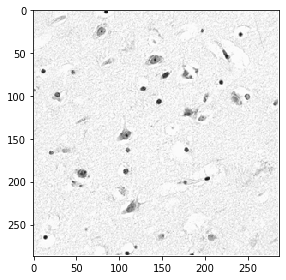

In [ ]:
gray_image = cv.imread('/content/Img4.bmp', cv.IMREAD_GRAYSCALE)
imshow(gray_image)

Analisando visualmente o histograma da imagem pelo método *hist* (do pacote *matplotlib.pyplot*).

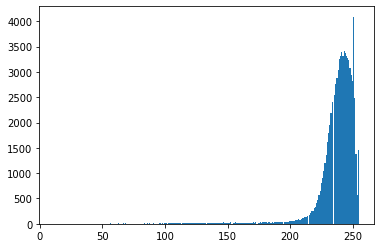

In [ ]:
plt.hist(gray_image.ravel(), bins=255)
plt.show()

# Limiarização

Implementação própria da função de binarização/limiarização de uma imagem a partir de um limiar.

In [ ]:
def thresholding(image, th):
  binary = np.zeros(image.shape) #criando a imagem resultado
  row, column = image.shape

  for i in range(row):
    for j in range(column): #iterando sobre os pixels da imagem em tons de cinza
      if image[i, j] >= th: #se for maior ou igual que o limiar, recebe 0 (preto)
        binary[i, j] = 0
      else: #se for menor, recebe 1 (branco)
        binary[i, j] = 1

  return binary

Executando a função para o limiar 223. E exibindo o resultado binário em seguida.

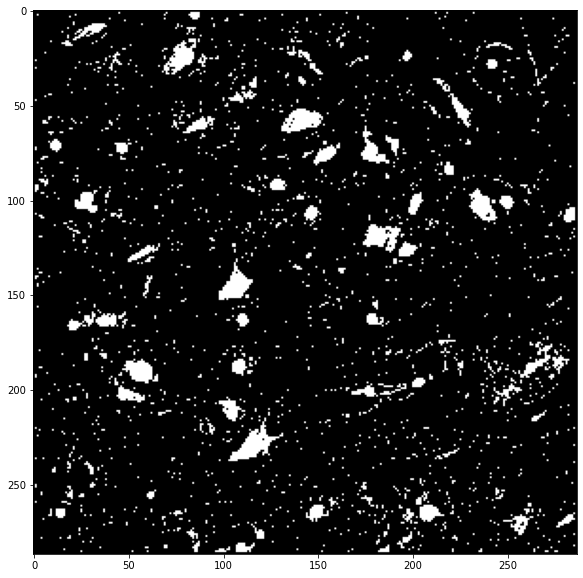

In [ ]:
binary_image = thresholding(gray_image, th = 223)
plt.figure(figsize = (10,10))
plt.imshow(binary_image, cmap='gray')

Limiar **223** produziu uma binarização semelhante ao indicado na imagem B (do slide).

# Operadores morfológicos

Testando diferentes elementos estruturantes para a transformação morfológica de abertura. Esse processo foi por métodos do pacote *skimage.morphology*, como: *square* e *opening*. Foi escolhida a transformação de abertura uma vez que o processo de interesse (B para C, do slide) tinha como objetivo eliminar ruídos brancos em uma imagem de fundo preto. O elemento estruturante quadrado foi escolhido já que as feições de interesse no resultado tinham formato semelhante à um quadrado.

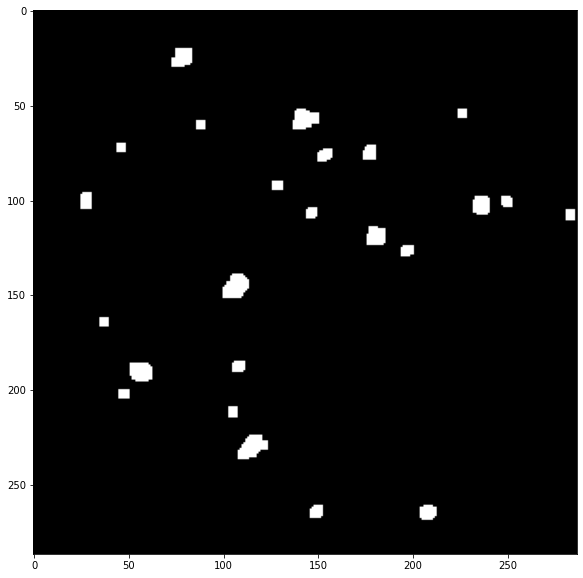

In [ ]:
elemento_est = morphology.square(5)
result = morphology.opening(binary_image, elemento_est)
plt.figure(figsize = (10,10))
plt.imshow(result, cmap='gray')

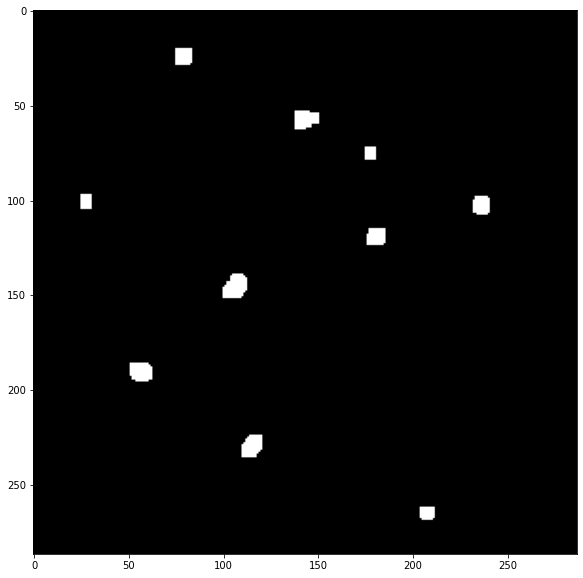

In [ ]:
elemento_est = morphology.square(6)
result = morphology.opening(binary_image, elemento_est)
plt.figure(figsize = (10,10))
plt.imshow(result, cmap='gray')

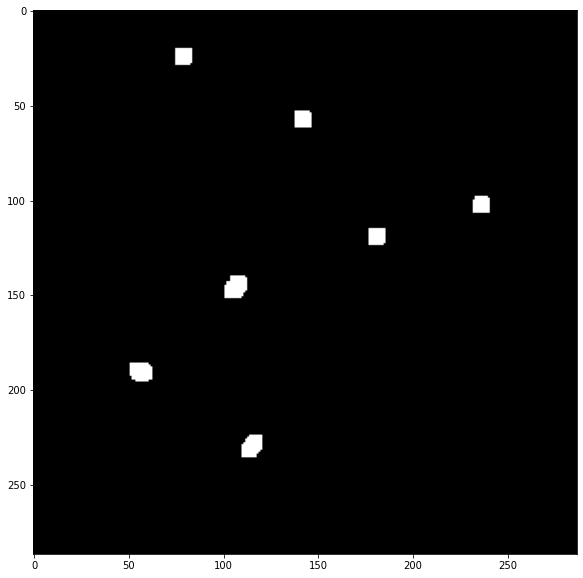

In [ ]:
elemento_est = morphology.square(7)
result = morphology.opening(binary_image, elemento_est)
plt.figure(figsize = (10,10))
plt.imshow(result, cmap='gray')

O uso do operador **abertura** com elemento estruturante no formato **quadrado** com tamanho **6x6**, foi a combinação que permitiu chegar próximo ao resultado, apesar de ter um elemento a mais. Provavelmente isso se deve à pequenas diferenças nos resultados da binarização.